In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns


from pneumonia.ml_logic.preprocessor import train_generator, val_generator, test_generator
from pneumonia.ml_logic.baseline import compile, fitting
from tensorflow.keras.layers import Rescaling
from tensorflow.keras import Input

from keras.applications.densenet import DenseNet121
from keras.layers import GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K


In [2]:
def dense_net():
    dense = DenseNet121(input_shape=(256, 256, 3), include_top=False, weights='imagenet', pooling='avg')
    dense.trainable = False
    
    input_dim = (256,256,3)
    scale = (1./255.)
    model = Sequential([
        dense,
        Input(shape=input_dim),
        Rescaling(scale),
        Flatten(),
        Dense(32, activation="relu"),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    
    # x = layers.Flatten()(model.output)
    # x = layers.Dense(1024, activation='relu')(x)
    # x = layers.Dropout(0.2)(x)

    # # Add a final sigmoid layer with 1 node for classification output
    # x = layers.Dense(1, activation='sigmoid')(x)
    # model = tf.keras.models.Model(model.input, x)
    return model

In [3]:
dense_model = dense_net()

Metal device set to: Apple M2 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-03-27 10:45:36.052863: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-27 10:45:36.053047: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
compile(dense_model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 input_2 (InputLayer)        multiple                  0         
                                                                 
 rescaling (Rescaling)       (None, 1024)              0         
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 32)                32800     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3

In [5]:
dense_model_history = fitting(dense_model)

Found 4716 files belonging to 2 classes.
Found 604 files belonging to 2 classes.
Epoch 1/20


2023-03-27 10:45:57.046759: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-27 10:45:59.568231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


148/148 [==============================] - ETA: 0s - loss: 0.2535 - accuracy: 0.7216 - recall: 0.6686

2023-03-27 10:46:26.492571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


148/148 [==============================] - 35s 208ms/step - loss: 0.2535 - accuracy: 0.7216 - recall: 0.6686 - val_loss: 0.6015 - val_accuracy: 0.7268 - val_recall: 0.7011
Epoch 2/20
148/148 [==============================] - 27s 177ms/step - loss: 0.2012 - accuracy: 0.7996 - recall: 0.7521 - val_loss: 0.5323 - val_accuracy: 0.7583 - val_recall: 0.7281
Epoch 3/20
148/148 [==============================] - 27s 177ms/step - loss: 0.1617 - accuracy: 0.8412 - recall: 0.8097 - val_loss: 0.4772 - val_accuracy: 0.7964 - val_recall: 0.7730
Epoch 4/20
148/148 [==============================] - 27s 178ms/step - loss: 0.1397 - accuracy: 0.8685 - recall: 0.8443 - val_loss: 0.4222 - val_accuracy: 0.8146 - val_recall: 0.8022
Epoch 5/20
148/148 [==============================] - 26s 176ms/step - loss: 0.1234 - accuracy: 0.8830 - recall: 0.8612 - val_loss: 0.3901 - val_accuracy: 0.8278 - val_recall: 0.8090
Epoch 6/20
148/148 [==============================] - 26s 174ms/step - loss: 0.1097 - accuracy: 

In [7]:
model, history = dense_model_history

Text(0.5, 1.0, 'Accuracy Evolution')

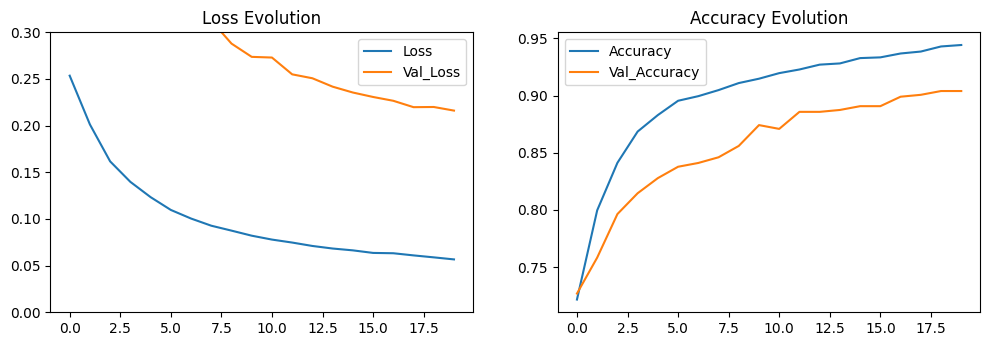

In [8]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.ylim(0, 0.3)
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')